<a href="https://colab.research.google.com/github/Sgh23/Covid-EDA-Exploratory-Data-Analysis-/blob/main/Covid_19_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Covid19 Dataset perform following taks:

1. Explore the dataset and features
2. find any missing values and visualize the same
3. Fill the missing values with different methods
4. Outlier detection and replacement
5. Create different dataframe like country wise, blood group wise, age (bin) wise, gender wise
6. visualize the same
7. create a pivot tables from the above groups
8. Merge these dataframes with respect to the index

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [3]:
df

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[58470 rows x 50 columns]

# Explore the dataset and features

### Number of Categorical Variables

In [4]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat=list(set(cols) - set(num_cols))
print('No of Categorical columns:',len(cat),"\n\n",cat)

No of Categorical columns: 5 

 ['location', 'iso_code', 'tests_units', 'date', 'continent']


### Number of Continuous Variables 

In [5]:
con=df._get_numeric_data().columns
print("No of Continuous columns:",len(df._get_numeric_data().columns),"\n\n",con)

No of Continuous columns: 45 

 Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabete

In [6]:
df.shape

(58470, 50)

In [7]:
df.head()

iso_code continent  ... life_expectancy human_development_index
0      AFG      Asia  ...           64.83                   0.498
1      AFG      Asia  ...           64.83                   0.498
2      AFG      Asia  ...           64.83                   0.498
3      AFG      Asia  ...           64.83                   0.498
4      AFG      Asia  ...           64.83                   0.498

[5 rows x 50 columns]

In [8]:
df.tail()

iso_code continent  ... life_expectancy human_development_index
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[5 rows x 50 columns]

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [11]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [12]:
df.isna().sum()

iso_code                                328
continent                               656
location                                  0
date                                      0
total_cases                            3638
new_cases                               931
new_cases_smoothed                     1745
total_deaths                          13128
new_deaths                              931
new_deaths_smoothed                    1745
total_cases_per_million                3930
new_cases_per_million                   995
new_cases_smoothed_per_million         1810
total_deaths_per_million              13405
new_deaths_per_million                  995
new_deaths_smoothed_per_million        1810
reproduction_rate                     20774
icu_patients                          53846
icu_patients_per_million              53846
hosp_patients                         53274
hosp_patients_per_million             53274
weekly_icu_admissions                 58074
weekly_icu_admissions_per_millio

In [13]:
df.describe(include="all") #All features included, categorical and continuous 

iso_code continent  ... life_expectancy human_development_index
count     58142     57814  ...    57392.000000            50158.000000
unique      215         6  ...             NaN                     NaN
top         IND    Europe  ...             NaN                     NaN
freq        328     15091  ...             NaN                     NaN
mean        NaN       NaN  ...       73.930237                0.722000
std         NaN       NaN  ...        7.398628                0.153302
min         NaN       NaN  ...       53.280000                0.354000
25%         NaN       NaN  ...       69.870000                0.601000
50%         NaN       NaN  ...       75.290000                0.752000
75%         NaN       NaN  ...       79.380000                0.847000
max         NaN       NaN  ...       86.750000                0.953000

[11 rows x 50 columns]

In [14]:
df.describe() # Only continuous values

total_cases      new_cases  ...  life_expectancy  human_development_index
count  5.483200e+04   57539.000000  ...     57392.000000             50158.000000
mean   1.749161e+05    2025.570691  ...        73.930237                 0.722000
std    1.769051e+06   19094.668107  ...         7.398628                 0.153302
min    1.000000e+00   -8261.000000  ...        53.280000                 0.354000
25%    1.870000e+02       0.000000  ...        69.870000                 0.601000
50%    2.154000e+03      14.000000  ...        75.290000                 0.752000
75%    2.380600e+04     244.000000  ...        79.380000                 0.847000
max    5.827538e+07  678774.000000  ...        86.750000                 0.953000

[8 rows x 45 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58470 entries, 0 to 58469
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            58142 non-null  object 
 1   continent                           57814 non-null  object 
 2   location                            58470 non-null  object 
 3   date                                58470 non-null  object 
 4   total_cases                         54832 non-null  float64
 5   new_cases                           57539 non-null  float64
 6   new_cases_smoothed                  56725 non-null  float64
 7   total_deaths                        45342 non-null  float64
 8   new_deaths                          57539 non-null  float64
 9   new_deaths_smoothed                 56725 non-null  float64
 10  total_cases_per_million             54540 non-null  float64
 11  new_cases_per_million               57475

In [16]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [17]:
col=df.columns
col=list(col)
value_count=[]

for i in col:
    print(df[i].unique())
    print(df[i].value_counts())
    
#prints the distinct values of each columns and their counts

['AFG' 'ALB' 'DZA' 'AND' 'AGO' 'AIA' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN'
 'CPV' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV'
 'CUB' 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV'
 'GNQ' 'ERI' 'EST' 'ETH' 'FRO' 'FLK' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB'
 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GGY' 'GIN' 'GNB'
 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN'
 'ISR' 'ITA' 'JAM' 'JPN' 'JEY' 'JOR' 'KAZ' 'KEN' 'OWID_KOS' 'KWT' 'KGZ'
 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MKD' 'MDG' 'MWI'
 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'MDA' 'MCO' 'MNG' 'MNE'
 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA'
 'MNP' 'NOR' 'OMN' 'PAK' 'PSE' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT'
 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'VCT' 'SM

In [18]:
df.describe(include=np.object)
# describe() won’t try to calculate a mean or a 
# standard deviation for the object columns, 
# since they mostly include text strings.
# This displays descriptive statistics.

iso_code continent location        date      tests_units
count     58142     57814    58470       58470            26116
unique      215         6      216         328                6
top         IND    Europe  Austria  2020-11-14  tests performed
freq        328     15091      328         215            15102

# Univariant Analysis

### Univariate analysis.“Uni” means one and “Variate” means variable hence univariate analysis means analysis of one variable or one feature. Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode, skewness kurtosis etc.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook

In [20]:
con
# Seaborn dist plot only works in continuous values

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers',

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


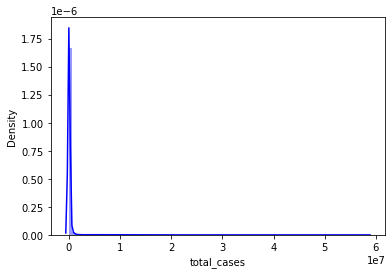

In [21]:
# TOTAL CASES
plt.figure(figsize=(6,4))
sns.distplot(df['total_cases'],color='blue',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


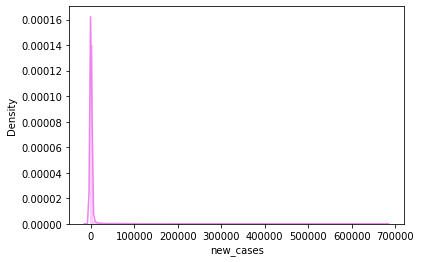

In [22]:
# NEW CASES
plt.figure(figsize=(6,4))
sns.distplot(df['new_cases'],color='violet',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


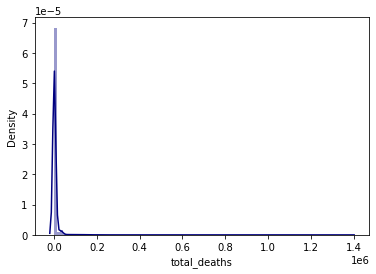

In [23]:
plt.figure(figsize=(6,4))
sns.distplot(df['total_deaths'],color='navy',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


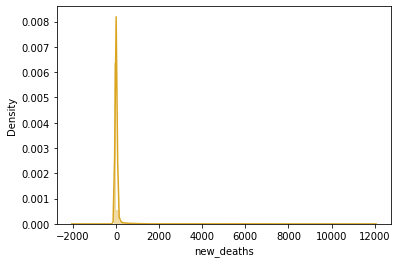

In [24]:
plt.figure(figsize=(6,4))
sns.distplot(df['new_deaths'],color='goldenrod',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


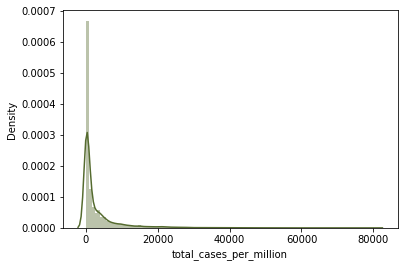

In [25]:
plt.figure(figsize=(6,4))
sns.distplot(df['total_cases_per_million'],color='darkolivegreen',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


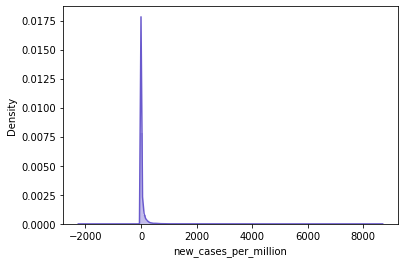

In [26]:
plt.figure(figsize=(6,4))
sns.distplot(df['new_cases_per_million'],color='slateblue',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


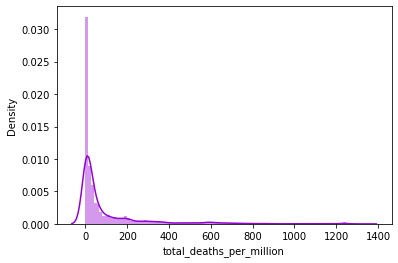

In [27]:
plt.figure(figsize=(6,4))
sns.distplot(df['total_deaths_per_million'],color='darkviolet',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


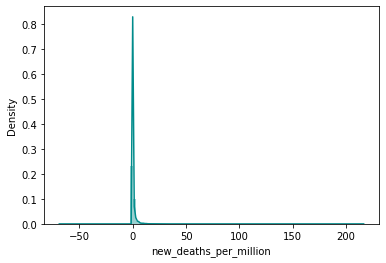

In [28]:
plt.figure(figsize=(6,4))
sns.distplot(df['new_deaths_per_million'],color='darkcyan',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


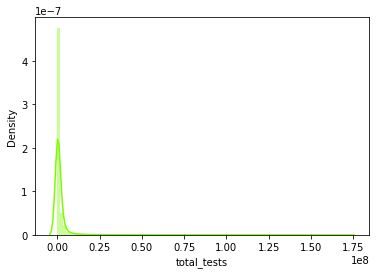

In [29]:
plt.figure(figsize=(6,4))
sns.distplot(df['total_tests'],color='lawngreen',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


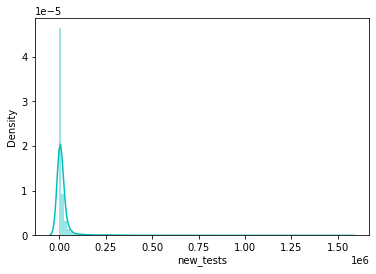

In [30]:
plt.figure(figsize=(6,4))
sns.distplot(df['new_tests'],color='c',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


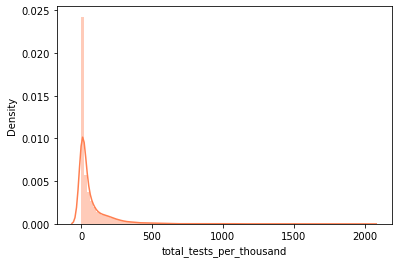

In [31]:
plt.figure(figsize=(6,4))
sns.distplot(df['total_tests_per_thousand'],color='coral',bins=100,hist_kws={'alpha':0.4})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


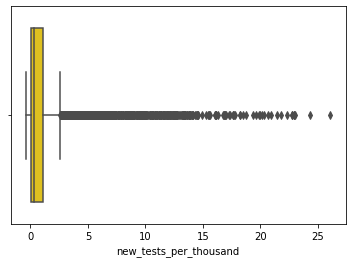

In [32]:
# new_tests_per_thousand
plt.figure(figsize=(6,4))
sns.boxplot(df['new_tests_per_thousand'],color='gold')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


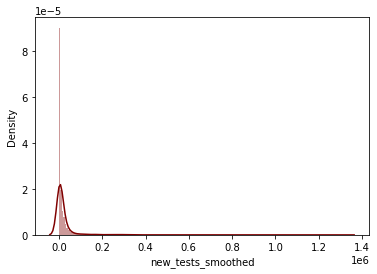

In [33]:
# new_tests_smoothed
plt.figure(figsize=(6,4))
sns.distplot(df['new_tests_smoothed'],color='maroon',bins=200)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


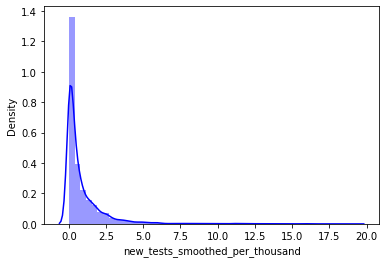

In [34]:
# new_tests_smoothed_per_thousand
sns.distplot(df['new_tests_smoothed_per_thousand'],color="blue")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


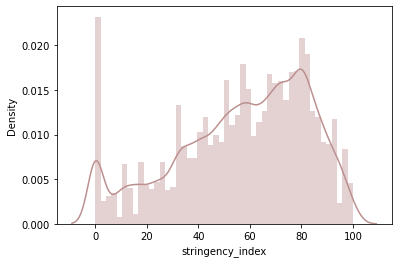

In [35]:
# stringency_index
sns.distplot(df['stringency_index'],color="rosybrown")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


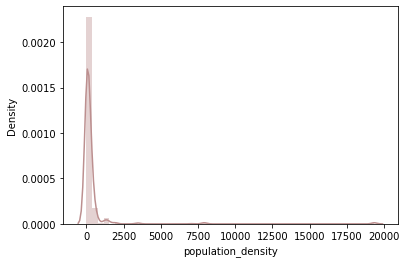

In [36]:
# population_density
sns.distplot(df['population_density'],color="rosybrown")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


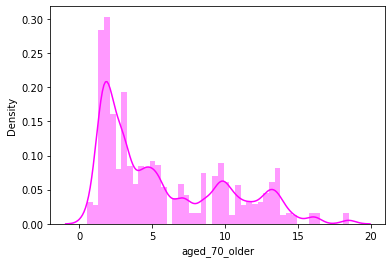

In [37]:
# aged_70_older
sns.distplot(df['aged_70_older'],color="fuchsia")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


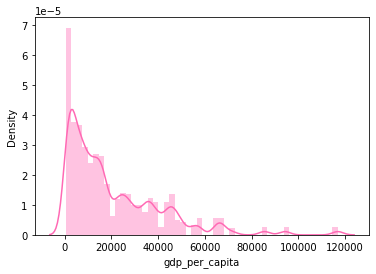

In [38]:
# gdp_per_capita
sns.distplot(df['gdp_per_capita'],color="hotpink")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


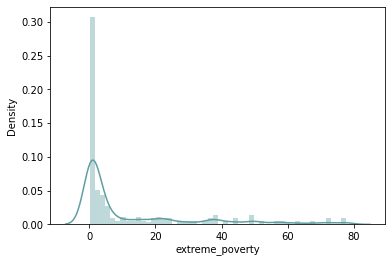

In [39]:
# extreme_poverty
sns.distplot(df['extreme_poverty'],color="cadetblue")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


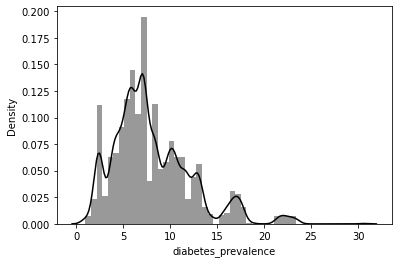

In [40]:
# diabetes_prevalence
sns.distplot(df['diabetes_prevalence'],color="black")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


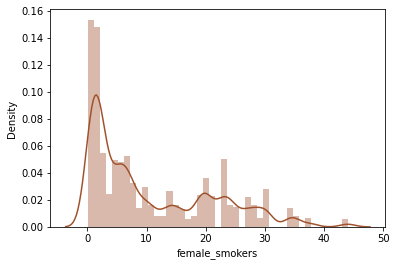

In [41]:
# female_smokers
sns.distplot(df['female_smokers'],color="sienna")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


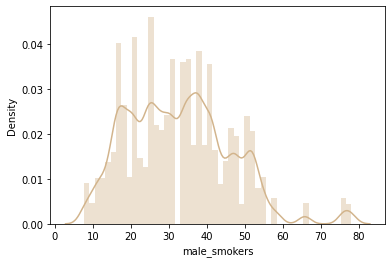

In [42]:
# male_smokers
sns.distplot(df['male_smokers'],color="tan")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


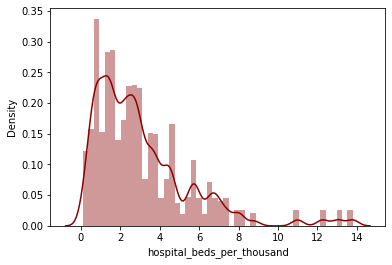

In [43]:
# hospital_beds_per_thousand
sns.distplot(df['hospital_beds_per_thousand'],color="darkred")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


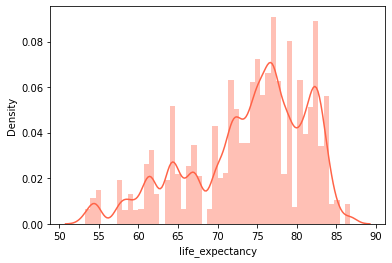

In [44]:
# life_expectancy
sns.distplot(df['life_expectancy'],color="tomato")

# BIVARIANT ANALYSIS

In [45]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [46]:
df_continents_cases = df.groupby(["continent"]).sum()
df_continents_cases

total_cases  ...  human_development_index
continent                    ...                         
Africa         1.984332e+08  ...                 7366.912
Asia           1.329801e+09  ...                 9824.667
Europe         9.419873e+08  ...                11006.294
North America  1.290068e+09  ...                 4580.196
Oceania        5.068400e+06  ...                 1009.638
South America  1.028503e+09  ...                 2426.356

[6 rows x 45 columns]

In [47]:
df_continents_cases1=df_continents_cases[["total_cases","total_deaths","total_tests","gdp_per_capita","extreme_poverty","handwashing_facilities"]]
df_continents_cases1.style.background_gradient(cmap='OrRd',subset=["total_cases"])\
                        .background_gradient(cmap='PuRd',subset=["total_deaths"])\
                        .background_gradient(cmap='RdPu',subset=["total_tests"])\
                        .background_gradient(cmap='BuPu',subset=["gdp_per_capita"])\
                        .background_gradient(cmap='YlGn',subset=["extreme_poverty"])\
                        .background_gradient(cmap='PuBu',subset=["handwashing_facilities"])\
                        .format("{:.3f}")

In [48]:
df_locations= df.groupby(["location"]).sum()
df_locations

total_cases  ...  human_development_index
location                      ...                         
Afghanistan     6.557920e+06  ...                  163.344
Albania         1.867004e+06  ...                  203.315
Algeria         6.987351e+06  ...                  247.312
Andorra         3.941550e+05  ...                  223.080
Angola          6.890890e+05  ...                  142.926
...                      ...  ...                      ...
Western Sahara  1.091100e+05  ...                    0.000
World           4.796942e+09  ...                    0.000
Yemen           2.992610e+05  ...                  102.604
Zambia          1.697109e+06  ...                  146.412
Zimbabwe        8.838910e+05  ...                  132.145

[216 rows x 45 columns]

In [49]:
df_locations1=df_locations[["total_cases","total_deaths","total_tests","gdp_per_capita","extreme_poverty","handwashing_facilities"]]
df_locations1.style.background_gradient(cmap='Greens',subset=["total_cases"])\
                        .background_gradient(cmap='magma',subset=["total_deaths"])\
                        .background_gradient(cmap='Pastel1_r',subset=["total_tests"])\
                        .background_gradient(cmap='inferno',subset=["gdp_per_capita"])\
                        .background_gradient(cmap='Reds',subset=["extreme_poverty"])\
                        .background_gradient(cmap='cividis',subset=["handwashing_facilities"])\
                        .format("{:.3f}")

# TOP 10 COUNTRIES

In [50]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [51]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

confirmiedcases = pd.DataFrame(df.groupby('location')['total_cases'].sum())
confirmiedcases['location'] = confirmiedcases.index
confirmiedcases.index = np.arange(1,217)

Deathcases = pd.DataFrame(df.groupby('location')['total_deaths'].sum())
Deathcases['location'] = Deathcases.index
Deathcases.iodex = np.arange(1,213)

total_tests = pd.DataFrame(df.groupby('location')['total_tests'].sum())
total_tests['location'] = total_tests.index
total_tests.iodex = np.arange(1,213)

hospital_beds = pd.DataFrame(df.groupby('location')['hospital_beds_per_thousand'].sum())
hospital_beds['location'] = hospital_beds.index
hospital_beds.iodex = np.arange(1,213)

global_hospital_beds = hospital_beds[['location','hospital_beds_per_thousand']]
global_Deathcases = Deathcases[['location','total_deaths']]
global_total_tests = total_tests[['location','total_tests']]
global_confirmiedcases = confirmiedcases[['location','total_cases']]

fig=px.bar(global_confirmiedcases.sort_values('total_cases',ascending=False)[:20][::-1],x='total_cases',y='location',text='total_cases',title='Total/Confirmed Cases Worldwide', height=900, orientation='h',color="location")
fig.show()
fig=px.bar(global_Deathcases.sort_values('total_deaths',ascending=False)[:20][::-1],x='total_deaths',y='location',text='total_deaths',title='Deaths Cases Worldwide', height=900, orientation='h',color="total_deaths")
fig.show()
fig=px.bar(total_tests.sort_values('total_tests',ascending=False)[:20][::-1],x='total_tests',y='location',title='Total Tests Worldwide',text='total_tests', height=900, orientation='h',color="total_tests")
fig.show()
fig=px.bar(global_hospital_beds.sort_values('hospital_beds_per_thousand',ascending=False)[:20][::-1],x='hospital_beds_per_thousand',y='location',title='Beds in Hospital per 1000',text='hospital_beds_per_thousand', height=900, orientation='h',color="hospital_beds_per_thousand")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [52]:
df.corr()

total_cases  ...  human_development_index
total_cases                            1.000000  ...                 0.096140
new_cases                              0.967379  ...                 0.099789
new_cases_smoothed                     0.972897  ...                 0.100460
total_deaths                           0.974039  ...                 0.155167
new_deaths                             0.806814  ...                 0.115053
new_deaths_smoothed                    0.824082  ...                 0.123626
total_cases_per_million                0.082381  ...                 0.285981
new_cases_per_million                  0.033540  ...                 0.208919
new_cases_smoothed_per_million         0.043058  ...                 0.236665
total_deaths_per_million               0.091542  ...                 0.338460
new_deaths_per_million                 0.028101  ...                 0.152442
new_deaths_smoothed_per_million        0.042286  ...                 0.206529
reproduction_rate                      0.004123  ...                 0.186507
icu_patients                           0.719727  ...                 0.178975
icu_patients_per_million               0.158034  ...                 0.040808
hosp_patients                          0.726198  ...                 0.176110
hosp_patients_per_million              0.141897  ...                -0.050367
weekly_icu_admissions                  0.347311  ...                 0.117430
weekly_icu_admissions_per_million     -0.025715  ...                -0.018177
weekly_hosp_admissions                 0.446170  ...                 0.031479
weekly_hosp_admissions_per_million     0.016647  ...                -0.202995
total_tests                            0.945126  ...                 0.095887
new_tests                              0.910830  ...                 0.096454
total_tests_per_thousand               0.114746  ...                 0.350735
new_tests_per_thousand                 0.093122  ...                 0.383313
new_tests_smoothed                     0.904890  ...                 0.107850
new_tests_smoothed_per_thousand        0.096589  ...                 0.405299
tests_per_case                        -0.037510  ...                 0.079293
positive_rate                          0.042795  ...                -0.178999
stringency_index                       0.049677  ...                -0.141988
population                             0.637495  ...                -0.022788
population_density                    -0.014812  ...                 0.150609
median_age                             0.020828  ...                 0.887139
aged_65_older                          0.015463  ...                 0.760783
aged_70_older                          0.013184  ...                 0.748162
gdp_per_capita                         0.008845  ...                 0.755875
extreme_poverty                       -0.031163  ...                -0.768897
cardiovasc_death_rate                 -0.029783  ...                -0.439477
diabetes_prevalence                    0.014433  ...                 0.245978
female_smokers                        -0.010414  ...                 0.574170
male_smokers                          -0.012874  ...                 0.085502
handwashing_facilities                 0.030639  ...                 0.842498
hospital_beds_per_thousand            -0.014950  ...                 0.539821
life_expectancy                        0.007229  ...                 0.913167
human_development_index                0.096140  ...                 1.000000

[45 rows x 45 columns]

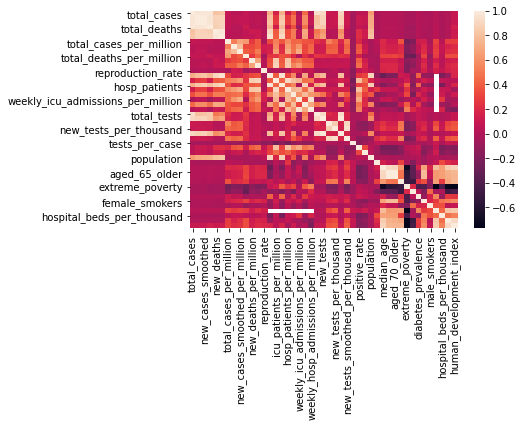

In [53]:
sns.heatmap(df.corr())

In [54]:
temp_df = pd.DataFrame(df_locations['total_cases'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="location",
                    color=np.log10(temp_df["total_cases"]), 
                    hover_name="location", 
                    hover_data=["total_cases"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
# fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Total Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Total Cases(Log Scale)",colorscale="viridis")
fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In [55]:
temp_df = pd.DataFrame(df_locations['total_deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="location",
                    color=np.log10(temp_df["total_deaths"]), 
                    hover_name="location", 
                    hover_data=["total_deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
# fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Total Death Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Total Death Cases(Log Scale)",colorscale="cividis")
fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In [56]:
import plotly.express as px

import pandas as pd
dftime = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
dftime['date']  = pd.to_datetime(dftime['date'])
fig = px.line(dftime, x='date', y='total_cases')
fig.show()

# Find any missing values and visualize the same

In [57]:
df.isna().sum()

iso_code                                328
continent                               656
location                                  0
date                                      0
total_cases                            3638
new_cases                               931
new_cases_smoothed                     1745
total_deaths                          13128
new_deaths                              931
new_deaths_smoothed                    1745
total_cases_per_million                3930
new_cases_per_million                   995
new_cases_smoothed_per_million         1810
total_deaths_per_million              13405
new_deaths_per_million                  995
new_deaths_smoothed_per_million        1810
reproduction_rate                     20774
icu_patients                          53846
icu_patients_per_million              53846
hosp_patients                         53274
hosp_patients_per_million             53274
weekly_icu_admissions                 58074
weekly_icu_admissions_per_millio

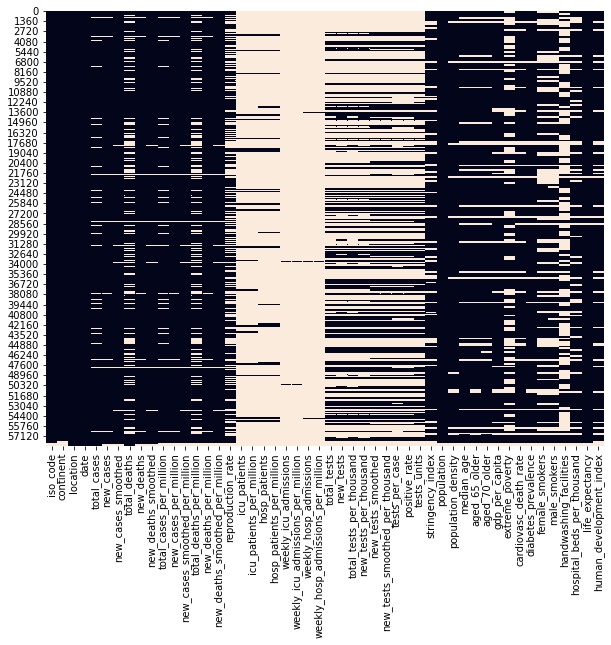

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna(),cbar=False)
#This code tells us the information of missing values and their occurence

In [59]:
import missingno as msn

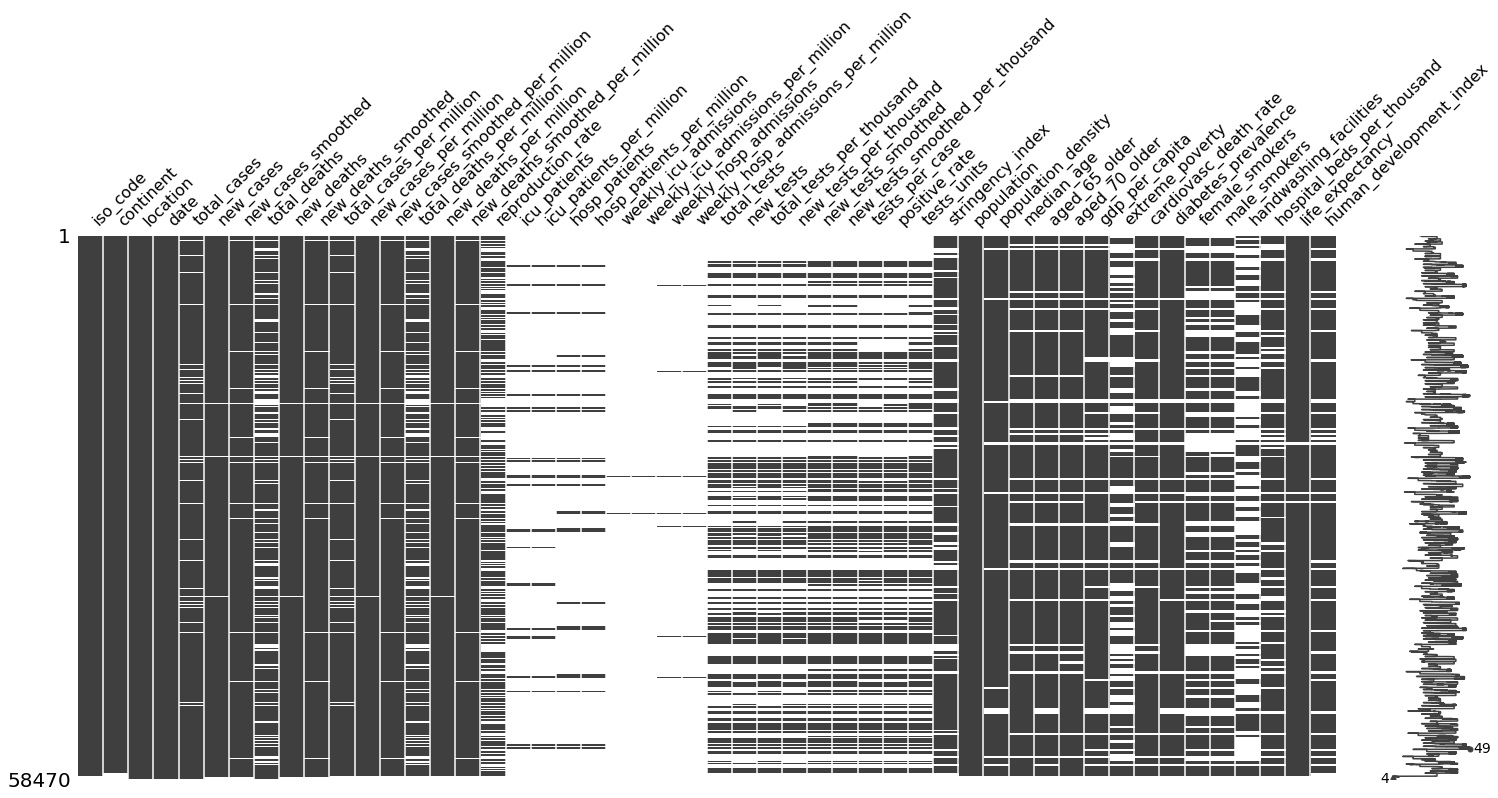

In [60]:
msn.matrix(df)

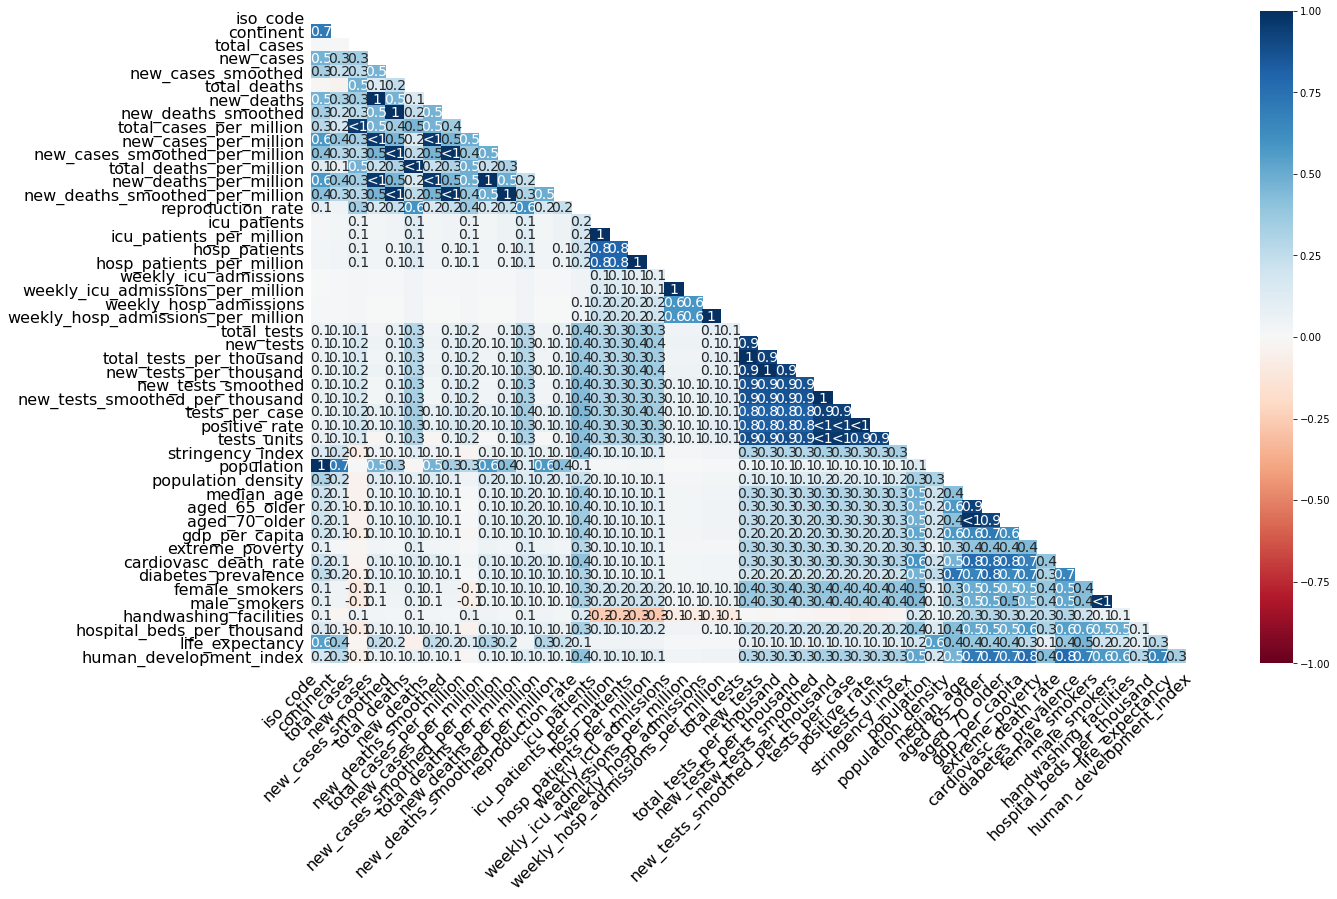

In [61]:
msn.heatmap(df)
#missingno.heatmap visualizes the correlation matrix about the locations of missing values in columns.

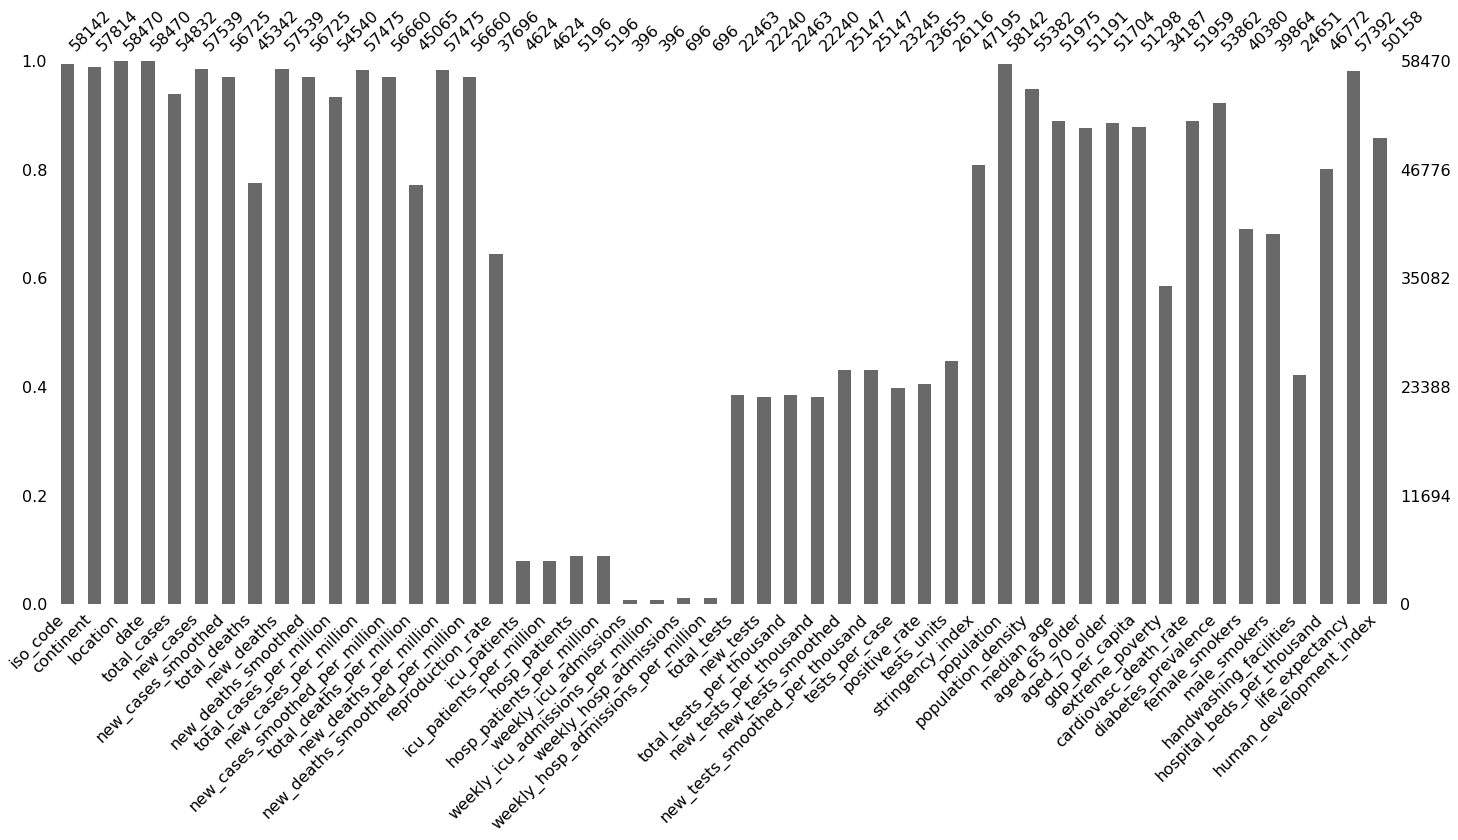

In [62]:
msn.bar(df)

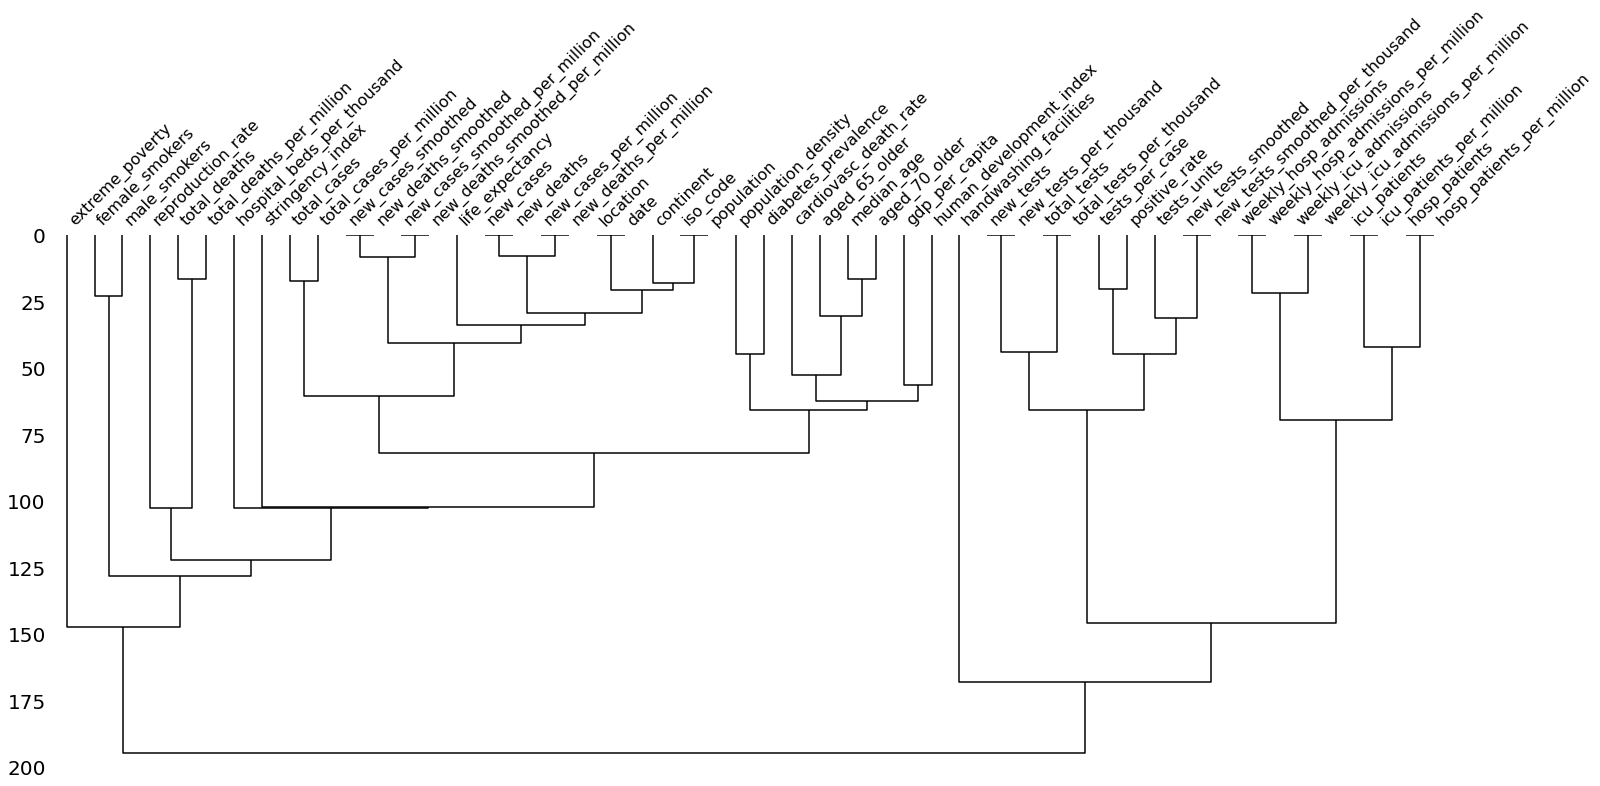

In [63]:
msn.dendrogram(df)
#The dendrogram allows more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

# Fill the missing values with different methods

In [64]:
print(df,"\n\n",df.isnull())
# To check the null values in Dataframe use isnull().

      iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[58470 rows x 50 columns] 

        iso_code  continent  ...  life_expectancy  human_development_index
0         False      False  ...            False        

In [65]:
df.isna() # na is not available returns in true or false

iso_code  continent  ...  life_expectancy  human_development_index
0         False      False  ...            False                    False
1         False      False  ...            False                    False
2         False      False  ...            False                    False
3         False      False  ...            False                    False
4         False      False  ...            False                    False
...         ...        ...  ...              ...                      ...
58465      True       True  ...             True                     True
58466      True       True  ...             True                     True
58467      True       True  ...             True                     True
58468      True       True  ...             True                     True
58469      True       True  ...             True                     True

[58470 rows x 50 columns]

In [66]:
print(df.notnull())

       iso_code  continent  ...  life_expectancy  human_development_index
0          True       True  ...             True                     True
1          True       True  ...             True                     True
2          True       True  ...             True                     True
3          True       True  ...             True                     True
4          True       True  ...             True                     True
...         ...        ...  ...              ...                      ...
58465     False      False  ...            False                    False
58466     False      False  ...            False                    False
58467     False      False  ...            False                    False
58468     False      False  ...            False                    False
58469     False      False  ...            False                    False

[58470 rows x 50 columns]


In [67]:
df.notna()

iso_code  continent  ...  life_expectancy  human_development_index
0          True       True  ...             True                     True
1          True       True  ...             True                     True
2          True       True  ...             True                     True
3          True       True  ...             True                     True
4          True       True  ...             True                     True
...         ...        ...  ...              ...                      ...
58465     False      False  ...            False                    False
58466     False      False  ...            False                    False
58467     False      False  ...            False                    False
58468     False      False  ...            False                    False
58469     False      False  ...            False                    False

[58470 rows x 50 columns]

# dropna()

In [68]:
dropnulldf=df.dropna()
dropnulldf

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_per_case, positive_rate, tests_units, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index]
Index: []

In [69]:
df_axis1any=df.dropna(axis=1,how='any')
df_axis1any ##Axis is 1 and how="any"

location        date
0        Afghanistan  2019-12-31
1        Afghanistan  2020-01-01
2        Afghanistan  2020-01-02
3        Afghanistan  2020-01-03
4        Afghanistan  2020-01-04
...              ...         ...
58465  International  2020-11-18
58466  International  2020-11-19
58467  International  2020-11-20
58468  International  2020-11-21
58469  International  2020-11-22

[58470 rows x 2 columns]

In [70]:
 print("Old frame size",df.shape,"New frame size",df_axis1any.shape)

Old frame size (58470, 50) New frame size (58470, 2)


In [71]:
# Axis 0 i.e. rows and how="any"
df_axis0any=df.dropna(axis=0,how='any')
df_axis0any

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_per_case, positive_rate, tests_units, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index]
Index: []

In [72]:
print("Old frame size",df.shape,"New frame size",df_axis0any.shape)

Old frame size (58470, 50) New frame size (0, 50)


In [73]:
#Axis=1 i.e. columns and how="all"
dfnew_axis1all=df.dropna(axis=1,how='all')
dfnew_axis1all
#It has not dropped any columns because non of the columns has all na.

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[58470 rows x 50 columns]

In [74]:
#Axis is 0 i.e. row and how='all'
dfnew_axis0all=df.dropna(axis=0, how='all')
dfnew_axis0all
#Didn't drop any rows because non of them has the entire row with NA values.

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[58470 rows x 50 columns]

In [75]:
df.dropna(thresh=5) 
#keeps rows with atleast 5 non NaN values

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58208      NaN       NaN  ...             NaN                     NaN
58209      NaN       NaN  ...             NaN                     NaN
58210      NaN       NaN  ...             NaN                     NaN
58211      NaN       NaN  ...             NaN                     NaN
58212      NaN       NaN  ...             NaN                     NaN

[58207 rows x 50 columns]

In [76]:
df.dropna(subset=['location','date']) #there should be no NaN values in Area or age

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[58470 rows x 50 columns]

# fillna()

fillna() manages and lets the user replace NaN values with some value of their own.

In [77]:
df.isna().sum()

iso_code                                328
continent                               656
location                                  0
date                                      0
total_cases                            3638
new_cases                               931
new_cases_smoothed                     1745
total_deaths                          13128
new_deaths                              931
new_deaths_smoothed                    1745
total_cases_per_million                3930
new_cases_per_million                   995
new_cases_smoothed_per_million         1810
total_deaths_per_million              13405
new_deaths_per_million                  995
new_deaths_smoothed_per_million        1810
reproduction_rate                     20774
icu_patients                          53846
icu_patients_per_million              53846
hosp_patients                         53274
hosp_patients_per_million             53274
weekly_icu_admissions                 58074
weekly_icu_admissions_per_millio

In [78]:
df['iso_code'].fillna("NILL")
df

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[58470 rows x 50 columns]

In [79]:
df['total_cases'].fillna(0)#inplace=True
df

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[58470 rows x 50 columns]

In [80]:
df['total_cases'].fillna(method='ffill',limit=10)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
58465    696.0
58466    696.0
58467    696.0
58468    696.0
58469    696.0
Name: total_cases, Length: 58470, dtype: float64

In [81]:
dffill=df.fillna(method='ffill') #forward fill 
#ffill/pad
dffill

iso_code continent  ... life_expectancy human_development_index
0           AFG      Asia  ...           64.83                   0.498
1           AFG      Asia  ...           64.83                   0.498
2           AFG      Asia  ...           64.83                   0.498
3           AFG      Asia  ...           64.83                   0.498
4           AFG      Asia  ...           64.83                   0.498
...         ...       ...  ...             ...                     ...
58465  OWID_WRL    Africa  ...           72.58                   0.535
58466  OWID_WRL    Africa  ...           72.58                   0.535
58467  OWID_WRL    Africa  ...           72.58                   0.535
58468  OWID_WRL    Africa  ...           72.58                   0.535
58469  OWID_WRL    Africa  ...           72.58                   0.535

[58470 rows x 50 columns]

In [82]:
dfbfill=df.fillna(method='bfill') #backward fill
#backfill/bfill
dfbfill

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[58470 rows x 50 columns]

In [83]:
df.fillna(0,downcast='infer')
# string ‘infer’ which will try to downcast to an appropriate equal type 
# (e.g. float64 to int64 if possible).

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465        0         0  ...            0.00                   0.000
58466        0         0  ...            0.00                   0.000
58467        0         0  ...            0.00                   0.000
58468        0         0  ...            0.00                   0.000
58469        0         0  ...            0.00                   0.000

[58470 rows x 50 columns]

In [84]:
values={'total_cases':np.random.randint(5),'new_cases':np.random.randint(10),'total_deaths':4}
dfvaluenp=df.fillna(value=values,limit=3)
dfvaluenp

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...             NaN                     NaN
58466      NaN       NaN  ...             NaN                     NaN
58467      NaN       NaN  ...             NaN                     NaN
58468      NaN       NaN  ...             NaN                     NaN
58469      NaN       NaN  ...             NaN                     NaN

[58470 rows x 50 columns]

# INTERPOLATE

In [85]:
df.interpolate(limit_direction='both')
# the default method is linear
# limit_direction=both means that it will fill NaN's on both the sides forward as well as backward

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      NaN       NaN  ...           72.58                   0.535
58466      NaN       NaN  ...           72.58                   0.535
58467      NaN       NaN  ...           72.58                   0.535
58468      NaN       NaN  ...           72.58                   0.535
58469      NaN       NaN  ...           72.58                   0.535

[58470 rows x 50 columns]

In [86]:
# TIME:
cov=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv",parse_dates=['date'])
print(type(cov.date[0]))
cov.set_index('date',inplace=True)
print(cov)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
           iso_code continent  ... life_expectancy  human_development_index
date                           ...                                         
2019-12-31      AFG      Asia  ...           64.83                    0.498
2020-01-01      AFG      Asia  ...           64.83                    0.498
2020-01-02      AFG      Asia  ...           64.83                    0.498
2020-01-03      AFG      Asia  ...           64.83                    0.498
2020-01-04      AFG      Asia  ...           64.83                    0.498
...             ...       ...  ...             ...                      ...
2020-11-18      NaN       NaN  ...             NaN                      NaN
2020-11-19      NaN       NaN  ...             NaN                      NaN
2020-11-20      NaN       NaN  ...             NaN                      NaN
2020-11-21      NaN       NaN  ...             NaN                      NaN
2020-11-22      NaN       NaN  ...   

In [87]:
covtime=cov.interpolate(method ="time")
covtime
#Time Error: time-weighted interpolation only works on Series or DataFrames with a DatetimeIndex. It is a Value Error

iso_code continent  ... life_expectancy  human_development_index
date                           ...                                         
2019-12-31      AFG      Asia  ...           64.83                    0.498
2020-01-01      AFG      Asia  ...           64.83                    0.498
2020-01-02      AFG      Asia  ...           64.83                    0.498
2020-01-03      AFG      Asia  ...           64.83                    0.498
2020-01-04      AFG      Asia  ...           64.83                    0.498
...             ...       ...  ...             ...                      ...
2020-11-18      NaN       NaN  ...           71.72                    0.685
2020-11-19      NaN       NaN  ...           76.68                    0.732
2020-11-20      NaN       NaN  ...           66.32                    0.904
2020-11-21      NaN       NaN  ...           82.05                    0.847
2020-11-22      NaN       NaN  ...           72.58                    0.535

[58470 rows x 49 columns]

In [88]:
df.interpolate(method='linear',limit_direction='both',inplace=True)

In [89]:
df.isna().sum()

iso_code                                328
continent                               656
location                                  0
date                                      0
total_cases                               0
new_cases                                 0
new_cases_smoothed                        0
total_deaths                              0
new_deaths                                0
new_deaths_smoothed                       0
total_cases_per_million                   0
new_cases_per_million                     0
new_cases_smoothed_per_million            0
total_deaths_per_million                  0
new_deaths_per_million                    0
new_deaths_smoothed_per_million           0
reproduction_rate                         0
icu_patients                              0
icu_patients_per_million                  0
hosp_patients                             0
hosp_patients_per_million                 0
weekly_icu_admissions                     0
weekly_icu_admissions_per_millio

In [90]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df.apply(lambda x: x.fillna(x.value_counts().index[0]))

iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
58465      IND    Europe  ...           72.58                   0.535
58466      IND    Europe  ...           72.58                   0.535
58467      IND    Europe  ...           72.58                   0.535
58468      IND    Europe  ...           72.58                   0.535
58469      IND    Europe  ...           72.58                   0.535

[58470 rows x 50 columns]

In [91]:
df.isna().sum()

iso_code                                328
continent                               656
location                                  0
date                                      0
total_cases                               0
new_cases                                 0
new_cases_smoothed                        0
total_deaths                              0
new_deaths                                0
new_deaths_smoothed                       0
total_cases_per_million                   0
new_cases_per_million                     0
new_cases_smoothed_per_million            0
total_deaths_per_million                  0
new_deaths_per_million                    0
new_deaths_smoothed_per_million           0
reproduction_rate                         0
icu_patients                              0
icu_patients_per_million                  0
hosp_patients                             0
hosp_patients_per_million                 0
weekly_icu_admissions                     0
weekly_icu_admissions_per_millio

# Outlier detection and replacement

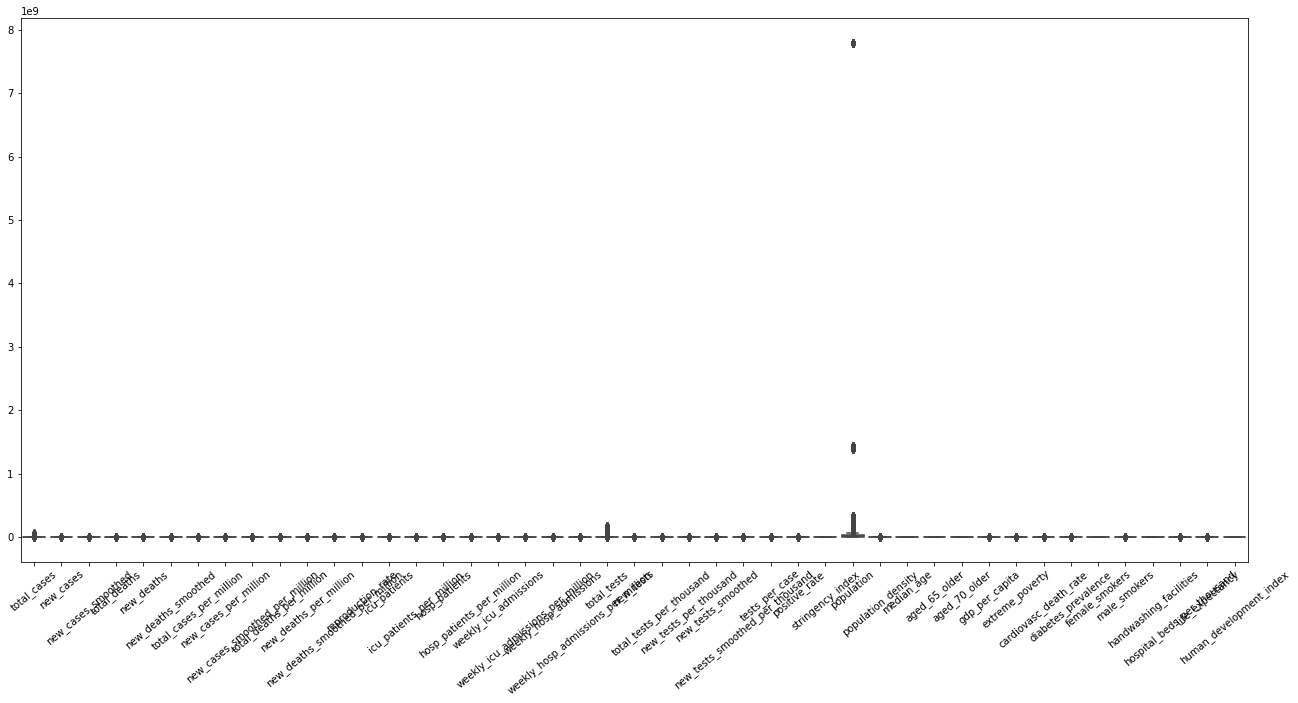

In [92]:
from matplotlib import pyplot
a4_dims = (22,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
sns.boxplot(data=df,ax=ax)
plt.show()

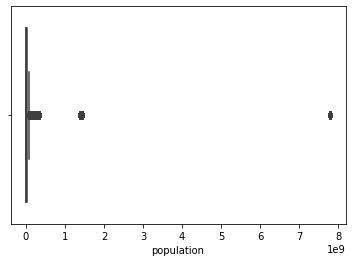

In [93]:
sns.boxplot(x=df['population'])

In [94]:
#Finding outliers using Z-score
# con=df._get_numeric_data().columns
con=df[['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]
from scipy import stats
z=np.abs(stats.zscore(con))
print(z)
# con

[[0.10002608 0.10533365 0.10706906 ... 1.05554083 1.23341811 1.47594188]
 [0.10002608 0.10533365 0.10706906 ... 1.05554083 1.23341811 1.47594188]
 [0.10002608 0.10533365 0.10706906 ... 1.05554083 1.23341811 1.47594188]
 ...
 [0.09966209 0.10580874 0.1071382  ... 0.13169549 0.18054345 1.22991108]
 [0.09966209 0.10580874 0.1071382  ... 0.13169549 0.18054345 1.22991108]
 [0.09966209 0.10580874 0.1071382  ... 0.13169549 0.18054345 1.22991108]]


In [95]:
print(np.where(z>3))

(array([  926,   934,   934, ..., 58469, 58469, 58469]), array([ 7,  7, 10, ..., 13, 15, 30]))


In [96]:
Q1 = con.quantile(0.25)
Q3 = con.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

total_cases                           2.538975e+04
new_cases                             2.370000e+02
new_cases_smoothed                    2.545362e+02
total_deaths                          7.730000e+02
new_deaths                            4.000000e+00
new_deaths_smoothed                   4.143000e+00
total_cases_per_million               3.702398e+03
new_cases_per_million                 2.792825e+01
new_cases_smoothed_per_million        3.232600e+01
total_deaths_per_million              9.744750e+01
new_deaths_per_million                3.140000e-01
new_deaths_smoothed_per_million       4.730000e-01
reproduction_rate                     3.753359e-01
icu_patients                          1.725390e+03
icu_patients_per_million              3.748138e+01
hosp_patients                         8.359419e+03
hosp_patients_per_million             2.049541e+02
weekly_icu_admissions                 1.652587e+02
weekly_icu_admissions_per_million     6.598436e+00
weekly_hosp_admissions         

In [97]:
print((con < (Q1 - 1.5 * IQR))|(con > (Q3 + 1.5 * IQR)))

       total_cases  new_cases  ...  life_expectancy  human_development_index
0            False      False  ...            False                    False
1            False      False  ...            False                    False
2            False      False  ...            False                    False
3            False      False  ...            False                    False
4            False      False  ...            False                    False
...            ...        ...  ...              ...                      ...
58465        False      False  ...            False                    False
58466        False      False  ...            False                    False
58467        False      False  ...            False                    False
58468        False      False  ...            False                    False
58469        False      False  ...            False                    False

[58470 rows x 45 columns]


In [98]:
con_new = con[(z < 3).all(axis=1)]

In [99]:
con_new

total_cases  new_cases  ...  life_expectancy  human_development_index
0              1.0        0.0  ...            64.83                    0.498
1              1.0        0.0  ...            64.83                    0.498
2              1.0        0.0  ...            64.83                    0.498
3              1.0        0.0  ...            64.83                    0.498
4              1.0        0.0  ...            64.83                    0.498
...            ...        ...  ...              ...                      ...
55009     189618.0    24998.0  ...            78.86                    0.924
55010     216721.0    27103.0  ...            78.86                    0.924
55011     245540.0    28819.0  ...            78.86                    0.924
55012     277965.0    32425.0  ...            78.86                    0.924
55014     337635.0    25398.0  ...            78.86                    0.924

[38397 rows x 45 columns]

In [100]:
df_new = con_new[~((con_new < (Q1 - 1.5 * IQR)) |(con_new > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new.shape

(9967, 45)

## ANOTHER METHOD

In [101]:
#Since population column has ouliers, we remove the outliers of that particular column
population=df.population
population

0        3.892834e+07
1        3.892834e+07
2        3.892834e+07
3        3.892834e+07
4        3.892834e+07
             ...     
58465    7.794799e+09
58466    7.794799e+09
58467    7.794799e+09
58468    7.794799e+09
58469    7.794799e+09
Name: population, Length: 58470, dtype: float64

In [102]:
population.mean()

128604029.9276039

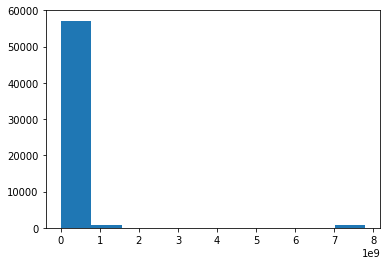

In [103]:
plt.hist(population)
plt.show()

In [104]:
lower_bound=0.1
upper_bound=0.95
res=df['population'].quantile([lower_bound,upper_bound])
res
#Any value >101073.0 is acceptable and any value <101073.0 is an outlier
#Any value <206139587.0 is acceptable and any value >206139587.0 is an outlier

0.10        97928.0
0.95    206139587.0
Name: population, dtype: float64

In [105]:
true_index=(res.loc[lower_bound]<df.population.values) & (df.population.values < res.loc[upper_bound])
true_index

array([ True,  True,  True, ..., False, False, False])

In [106]:
df.population[true_index]

0        38928341.0
1        38928341.0
2        38928341.0
3        38928341.0
4        38928341.0
            ...    
57809    14862927.0
57810    14862927.0
57811    14862927.0
57812    14862927.0
57813    14862927.0
Name: population, Length: 49605, dtype: float64

In [107]:
false_index=~true_index
false_index

array([False, False, False, ...,  True,  True,  True])

In [108]:
df.population[false_index]

915      7.726500e+04
916      7.726500e+04
917      7.726500e+04
918      7.726500e+04
919      7.726500e+04
             ...     
58465    7.794799e+09
58466    7.794799e+09
58467    7.794799e+09
58468    7.794799e+09
58469    7.794799e+09
Name: population, Length: 8865, dtype: float64

In [109]:
mid=np.median(df.population[true_index])
mid

9449321.0

In [110]:
df[false_index]=mid

In [111]:
df[false_index]

iso_code    continent  ... life_expectancy human_development_index
915    9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0
916    9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0
917    9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0
918    9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0
919    9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0
...            ...          ...  ...             ...                     ...
58465  9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0
58466  9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0
58467  9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0
58468  9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0
58469  9.44932e+06  9.44932e+06  ...       9449321.0               9449321.0

[8865 rows x 50 columns]

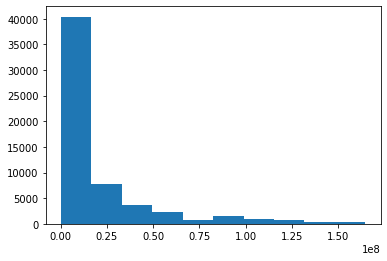

In [112]:
plt.hist(population)
plt.show()

# Create different dataframe like country wise and visualize the same

In [113]:
df_country_wise = df.groupby(["location"]).sum()
df_country_wise

total_cases  ...  human_development_index
location                      ...                         
9449321.0       8.376823e+10  ...             8.376823e+10
Afghanistan     6.558025e+06  ...             1.633440e+02
Albania         1.867004e+06  ...             2.033150e+02
Algeria         7.905046e+06  ...             2.473120e+02
Angola          6.890890e+05  ...             1.429260e+02
...                      ...  ...                      ...
Vietnam         1.352173e+06  ...             2.276320e+02
Western Sahara  1.091100e+05  ...             1.171092e+02
Yemen           2.992610e+05  ...             1.026040e+02
Zambia          1.697109e+06  ...             1.464120e+02
Zimbabwe        8.838910e+05  ...             1.321450e+02

[183 rows x 45 columns]

In [114]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

confirmiedcases = pd.DataFrame(df_country_wise.groupby('location')['total_cases'].sum())
confirmiedcases['location'] = confirmiedcases.index
confirmiedcases.index = np.arange(1,184)

Deathcases = pd.DataFrame(df_country_wise.groupby('location')['total_deaths'].sum())
Deathcases['location'] = Deathcases.index
Deathcases.iodex = np.arange(1,180)

total_tests = pd.DataFrame(df_country_wise.groupby('location')['total_tests'].sum())
total_tests['location'] = total_tests.index
total_tests.iodex = np.arange(1,180)

hospital_beds = pd.DataFrame(df_country_wise.groupby('location')['hospital_beds_per_thousand'].sum())
hospital_beds['location'] = hospital_beds.index
hospital_beds.iodex = np.arange(1,180)

global_hospital_beds = hospital_beds[['location','hospital_beds_per_thousand']]
global_Deathcases = Deathcases[['location','total_deaths']]
global_total_tests = total_tests[['location','total_tests']]
global_confirmiedcases = confirmiedcases[['location','total_cases']]

fig=px.bar(global_confirmiedcases.sort_values('total_cases',ascending=False)[::-3],x='total_cases',y='location',text='total_cases',title='Total/Confirmed Cases Country Wise', height=900, orientation='h',color="location")
fig.show()
fig=px.bar(global_Deathcases.sort_values('total_deaths',ascending=False)[:20][::-2],x='total_deaths',y='location',text='total_deaths',title='Deaths Cases Country Wise', height=900, orientation='h',color="total_deaths")
fig.show()
fig=px.bar(total_tests.sort_values('total_tests',ascending=False)[:20][::-2],x='total_tests',y='location',title='Total Tests Country Wise',text='total_tests', height=900, orientation='h',color="total_tests")
fig.show()
fig=px.bar(global_hospital_beds.sort_values('hospital_beds_per_thousand',ascending=False)[:20][::-2],x='hospital_beds_per_thousand',y='location',title='Beds in Hospital per 1000 Country Wise',text='hospital_beds_per_thousand', height=900, orientation='h',color="hospital_beds_per_thousand")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



# Create different dataframe like blood group wise visualize the same

In [115]:
#Since blood group column is not their test units coulmn is used
df_test_units = df.groupby(["tests_units"]).sum()
df_test_units

total_cases  ...  human_development_index
tests_units                                    ...                         
9449321.0                        8.376823e+10  ...             8.376823e+10
people tested                    3.549571e+08  ...             3.337832e+03
people tested (incl. non-PCR)    1.524856e+07  ...             3.532860e+02
samples tested                   1.856806e+08  ...             3.132974e+03
tests performed                  1.233908e+09  ...             1.150847e+04
tests performed (incl. non-PCR)  9.942912e+07  ...             3.896080e+02
units unclear                    1.306065e+07  ...             3.760980e+02

[7 rows x 45 columns]

In [116]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

confirmiedcases = pd.DataFrame(df_test_units.groupby('tests_units')['total_cases'].sum())
confirmiedcases['tests_units'] = confirmiedcases.index
confirmiedcases.index = np.arange(1,8)

Deathcases = pd.DataFrame(df_test_units.groupby('tests_units')['total_deaths'].sum())
Deathcases['tests_units'] = Deathcases.index
Deathcases.iodex = np.arange(1,6)

total_tests = pd.DataFrame(df_test_units.groupby('tests_units')['total_tests'].sum())
total_tests['tests_units'] = total_tests.index
total_tests.iodex = np.arange(1,6)

global_Deathcases = Deathcases[['tests_units','total_deaths']]
global_total_tests = total_tests[['tests_units','total_tests']]
global_confirmiedcases = confirmiedcases[['tests_units','total_cases']]

fig=px.bar(global_confirmiedcases.sort_values('total_cases',ascending=False)[1:],x='total_cases',y='tests_units',text='total_cases',title='Total/Confirmed Cases Test Unit wise', orientation='h',height=900,color="total_cases")
fig.show()
fig=px.bar(global_Deathcases.sort_values('total_deaths',ascending=False)[:20][1:],x='total_deaths',y='tests_units',text='total_deaths',title='Deaths Cases Test Unit wise',  orientation='h',height=900,color="total_deaths")
fig.show()
fig=px.bar(total_tests.sort_values('total_tests',ascending=False)[:20][1:],x='total_tests',y='tests_units',title='Total Tests Test Unit wise',text='total_tests', orientation='h', height=900,color="total_tests")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



# Create different dataframe like gdp (bin) wise visualize the same

In [117]:
#Since age is not present in the dataset, gdp per capita is divided into bins and visualised
df.gdp_per_capita.values.min()

661.24

In [118]:
df.gdp_per_capita.values.max()

9449321.0

In [119]:
df.gdp_per_capita.shape

(58470,)

In [120]:
# According to Sturges rule there should be 15 groups/bins/classes
# Class interval (range)/(no.of groups) which is 659316
df_gdp_wise_bins=df.groupby(["gdp_per_capita"]).sum()
df_gdp_wise_bins

total_cases  ...  human_development_index
gdp_per_capita                ...                         
661.240         7.588820e+05  ...             9.248400e+01
702.225         7.001600e+04  ...             9.841200e+01
752.788         2.091590e+05  ...             1.091850e+02
808.133         1.662127e+06  ...             1.165350e+02
926.000         2.425570e+05  ...             8.743800e+01
...                      ...  ...                      ...
71809.251       3.516900e+04  ...             2.192210e+02
85535.383       1.019341e+07  ...             3.056960e+02
94277.965       3.202234e+06  ...             2.965120e+02
116935.600      2.342597e+07  ...             2.807680e+02
9449321.000     8.376823e+10  ...             8.376823e+10

[2947 rows x 44 columns]

In [121]:
df_gdp_wise_bins['gdp_bins']=pd.cut(df_gdp_wise_bins.index,bins=[660,659977,1319293,1978609,2637925,3297241,3956557,4615873,5275189,5934505,6593821,7253137,7912453,8571769,9231085,9890401])

In [122]:
df_gdp_wise_bins

total_cases  ...            gdp_bins
gdp_per_capita                ...                    
661.240         7.588820e+05  ...       (660, 659977]
702.225         7.001600e+04  ...       (660, 659977]
752.788         2.091590e+05  ...       (660, 659977]
808.133         1.662127e+06  ...       (660, 659977]
926.000         2.425570e+05  ...       (660, 659977]
...                      ...  ...                 ...
71809.251       3.516900e+04  ...       (660, 659977]
85535.383       1.019341e+07  ...       (660, 659977]
94277.965       3.202234e+06  ...       (660, 659977]
116935.600      2.342597e+07  ...       (660, 659977]
9449321.000     8.376823e+10  ...  (9231085, 9890401]

[2947 rows x 45 columns]

In [123]:
df_gdp_wise_bins=df_gdp_wise_bins.reset_index()

In [124]:
df_gdp_bins=df_gdp_wise_bins.groupby(["gdp_bins"]).sum()
df_gdp_bins

gdp_per_capita  ...  human_development_index
gdp_bins                            ...                         
(660, 659977]         7.181614e+07  ...             3.587114e+04
(659977, 1319293]     0.000000e+00  ...             0.000000e+00
(1319293, 1978609]    0.000000e+00  ...             0.000000e+00
(1978609, 2637925]    0.000000e+00  ...             0.000000e+00
(2637925, 3297241]    0.000000e+00  ...             0.000000e+00
(3297241, 3956557]    0.000000e+00  ...             0.000000e+00
(3956557, 4615873]    0.000000e+00  ...             0.000000e+00
(4615873, 5275189]    0.000000e+00  ...             0.000000e+00
(5275189, 5934505]    0.000000e+00  ...             0.000000e+00
(5934505, 6593821]    0.000000e+00  ...             0.000000e+00
(6593821, 7253137]    0.000000e+00  ...             0.000000e+00
(7253137, 7912453]    0.000000e+00  ...             0.000000e+00
(7912453, 8571769]    0.000000e+00  ...             0.000000e+00
(8571769, 9231085]    0.000000e+00  ...             0.000000e+00
(9231085, 9890401]    9.449321e+06  ...             8.376823e+10

[15 rows x 45 columns]

In [125]:
df_gdp_bins.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 15 entries, (660, 659977] to (9231085, 9890401]
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gdp_per_capita                      15 non-null     float64
 1   total_cases                         15 non-null     float64
 2   new_cases                           15 non-null     float64
 3   new_cases_smoothed                  15 non-null     float64
 4   total_deaths                        15 non-null     float64
 5   new_deaths                          15 non-null     float64
 6   new_deaths_smoothed                 15 non-null     float64
 7   total_cases_per_million             15 non-null     float64
 8   new_cases_per_million               15 non-null     float64
 9   new_cases_smoothed_per_million      15 non-null     float64
 10  total_deaths_per_million            15 non-null     float64
 11  new_deaths_pe

In [126]:
df_gdp_bins.index=df_gdp_bins.index.astype(str)

In [127]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

confirmiedcases = pd.DataFrame(df_gdp_bins.groupby('gdp_bins')['total_cases'].sum())
confirmiedcases['gdp_bins'] = confirmiedcases.index
confirmiedcases.index = np.arange(1,16)

Deathcases = pd.DataFrame(df_gdp_bins.groupby('gdp_bins')['total_deaths'].sum())
Deathcases['gdp_bins'] = Deathcases.index
Deathcases.iodex = np.arange(1,16)

total_tests = pd.DataFrame(df_gdp_bins.groupby('gdp_bins')['total_tests'].sum())
total_tests['gdp_bins'] = total_tests.index
total_tests.iodex = np.arange(1,16)

global_Deathcases = Deathcases[['gdp_bins','total_deaths']]
global_total_tests = total_tests[['gdp_bins','total_tests']]
global_confirmiedcases = confirmiedcases[['gdp_bins','total_cases']]

fig=px.bar(global_confirmiedcases.sort_values('total_cases',ascending=False)[0:],x='total_cases',y='gdp_bins',text='total_cases',title='Total/Confirmed Cases GDP Bin Wise', orientation='h',height=900,color="total_cases")
fig.show()
fig=px.bar(global_Deathcases.sort_values('total_deaths',ascending=False)[:20][0:],x='total_deaths',y='gdp_bins',text='total_deaths',title='Deaths Cases GDP Bin Wise',  orientation='h',height=900,color="total_deaths")
fig.show()
fig=px.bar(total_tests.sort_values('total_tests',ascending=False)[:20][0:],x='total_tests',y='gdp_bins',title='Total Tests Test GDP Bin Wise',text='total_tests', orientation='h', height=900,color="total_tests")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [128]:
# Create different dataframe like ISO CODE wise visualize the same

In [129]:
# Since gender column is not there in the dataset, we'll visulaize with iso_code
df_iso=df.groupby(['iso_code']).sum()
df_iso

total_cases     new_cases  ...  life_expectancy  human_development_index
iso_code                               ...                                          
9449321.0  8.376823e+10  8.376823e+10  ...     8.376823e+10             8.376823e+10
ABW        3.696615e+05  4.754500e+03  ...     1.907250e+04             2.117500e+02
AFG        6.558025e+06  4.454150e+04  ...     2.126424e+04             1.633440e+02
AGO        6.890890e+05  1.441300e+04  ...     1.504290e+04             1.429260e+02
ALB        1.867004e+06  3.219600e+04  ...     2.034963e+04             2.033150e+02
...                 ...           ...  ...              ...                      ...
VUT        1.200000e+01  1.000000e+00  ...     8.456400e+02             7.236000e+00
YEM        2.992610e+05  2.093000e+03  ...     1.500924e+04             1.026040e+02
ZAF        8.800535e+07  7.654290e+05  ...     1.859770e+04             2.027100e+02
ZMB        1.697109e+06  1.739400e+04  ...     1.590861e+04             1.464120e+02
ZWE        8.838910e+05  9.172000e+03  ...     1.518803e+04             1.321450e+02

[183 rows x 45 columns]

In [130]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

confirmiedcases = pd.DataFrame(df_iso.groupby('iso_code')['total_cases'].sum())
confirmiedcases['iso_code'] = confirmiedcases.index
confirmiedcases.index = np.arange(1,184)

Deathcases = pd.DataFrame(df_iso.groupby('iso_code')['total_deaths'].sum())
Deathcases['iso_code'] = Deathcases.index
Deathcases.iodex = np.arange(1,180)

total_tests = pd.DataFrame(df_iso.groupby('iso_code')['total_tests'].sum())
total_tests['iso_code'] = total_tests.index
total_tests.iodex = np.arange(1,180)

global_Deathcases = Deathcases[['iso_code','total_deaths']]
global_total_tests = total_tests[['iso_code','total_tests']]
global_confirmiedcases = confirmiedcases[['iso_code','total_cases']]

fig=px.bar(global_confirmiedcases.sort_values('total_cases',ascending=False)[::-3],x='total_cases',y='iso_code',text='total_cases',title='Total/Confirmed Cases GDP Bin Wise', orientation='h',height=900,color="total_cases")
fig.show()
fig=px.bar(global_Deathcases.sort_values('total_deaths',ascending=False)[:20][::-2],x='total_deaths',y='iso_code',text='total_deaths',title='Deaths Cases GDP Bin Wise',  orientation='h',height=900,color="total_deaths")
fig.show()
fig=px.bar(total_tests.sort_values('total_tests',ascending=False)[:20][::-2],x='total_tests',y='iso_code',title='Total Tests Test GDP Bin Wise',text='total_tests', orientation='h', height=900,color="total_tests")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



# Create a pivot tables from the above groups
### df_country_wise
### df_test_units 
### df_gdp_bins
### df_iso

# SINGLE INDEX PIVOT TABLE

In [131]:
country_pivot=pd.pivot_table(data=df_country_wise,index=['location'])
country_pivot

aged_65_older  ...  weekly_icu_admissions_per_million
location                       ...                                   
9449321.0        8.376823e+10  ...                       8.376823e+10
Afghanistan      8.465680e+02  ...                       1.123400e+03
Albania          3.415692e+03  ...                       8.870750e+02
Algeria          2.037208e+03  ...                       1.123400e+03
Angola           5.916300e+02  ...                       8.425500e+02
...                       ...  ...                                ...
Vietnam          2.345200e+03  ...                       1.436968e+03
Western Sahara   9.963149e+02  ...                       9.243910e+02
Yemen            6.632940e+02  ...                       9.944870e+02
Zambia           6.175200e+02  ...                       1.090869e+03
Zimbabwe         6.970340e+02  ...                       1.082107e+03

[183 rows x 45 columns]

In [132]:
country_pivot_df=pd.pivot_table(data=df,index=['location'])
country_pivot_df # From Original Dataset

aged_65_older  ...  weekly_icu_admissions_per_million
location                       ...                                   
9449321.0        9.449321e+06  ...                        9449321.000
Afghanistan      2.581000e+00  ...                              3.425
Albania          1.318800e+01  ...                              3.425
Algeria          6.211000e+00  ...                              3.425
Angola           2.405000e+00  ...                              3.425
...                       ...  ...                                ...
Vietnam          7.150000e+00  ...                              4.381
Western Sahara   4.721871e+00  ...                              4.381
Yemen            2.922000e+00  ...                              4.381
Zambia           2.480000e+00  ...                              4.381
Zimbabwe         2.822000e+00  ...                              4.381

[183 rows x 45 columns]

In [133]:
test_units_pivot=pd.pivot_table(data=df_test_units,index=['tests_units'])
test_units_pivot

aged_65_older  ...  weekly_icu_admissions_per_million
tests_units                                     ...                                   
9449321.0                         8.376823e+10  ...                       8.376823e+10
people tested                     4.533226e+04  ...                       4.431352e+04
people tested (incl. non-PCR)     3.369036e+03  ...                       6.500866e+03
samples tested                    3.522971e+04  ...                       8.389391e+04
tests performed                   1.790414e+05  ...                       1.407612e+05
tests performed (incl. non-PCR)   9.297504e+03  ...                       3.865373e+03
units unclear                     1.515903e+03  ...                       2.549513e+03

[7 rows x 45 columns]

In [134]:
test_units_pivot_df=pd.pivot_table(data=df,index=['tests_units'])
test_units_pivot_df # From Original Dataset

aged_65_older  ...  weekly_icu_admissions_per_million
tests_units                                     ...                                   
9449321.0                         9.449321e+06  ...                       9.449321e+06
people tested                     1.082949e+01  ...                       1.058613e+01
people tested (incl. non-PCR)     6.806133e+00  ...                       1.313306e+01
samples tested                    7.665298e+00  ...                       1.825368e+01
tests performed                   1.235962e+01  ...                       9.717053e+00
tests performed (incl. non-PCR)   2.075336e+01  ...                       8.628066e+00
units unclear                     2.702144e+00  ...                       4.544586e+00

[7 rows x 45 columns]

In [135]:
gdp_bins_pivot=pd.pivot_table(data=df_gdp_bins,index=['gdp_bins'])
gdp_bins_pivot

aged_65_older  ...  weekly_icu_admissions_per_million
gdp_bins                           ...                                   
(1319293, 1978609]   0.000000e+00  ...                       0.000000e+00
(1978609, 2637925]   0.000000e+00  ...                       0.000000e+00
(2637925, 3297241]   0.000000e+00  ...                       0.000000e+00
(3297241, 3956557]   0.000000e+00  ...                       0.000000e+00
(3956557, 4615873]   0.000000e+00  ...                       0.000000e+00
(4615873, 5275189]   0.000000e+00  ...                       0.000000e+00
(5275189, 5934505]   0.000000e+00  ...                       0.000000e+00
(5934505, 6593821]   0.000000e+00  ...                       0.000000e+00
(6593821, 7253137]   0.000000e+00  ...                       0.000000e+00
(659977, 1319293]    0.000000e+00  ...                       0.000000e+00
(660, 659977]        4.593262e+05  ...                       5.535050e+05
(7253137, 7912453]   0.000000e+00  ...                       0.000000e+00
(7912453, 8571769]   0.000000e+00  ...                       0.000000e+00
(8571769, 9231085]   0.000000e+00  ...                       0.000000e+00
(9231085, 9890401]   8.376823e+10  ...                       8.376823e+10

[15 rows x 45 columns]

In [136]:
iso_pivot=pd.pivot_table(data=df_iso,index=['iso_code'])
iso_pivot

aged_65_older  ...  weekly_icu_admissions_per_million
iso_code                  ...                                   
9449321.0   8.376823e+10  ...                       8.376823e+10
ABW         3.271250e+03  ...                       8.562500e+02
AFG         8.465680e+02  ...                       1.123400e+03
AGO         5.916300e+02  ...                       8.425500e+02
ALB         3.415692e+03  ...                       8.870750e+02
...                  ...  ...                                ...
VUT         5.272800e+01  ...                       5.257200e+01
YEM         6.632940e+02  ...                       9.944870e+02
ZAF         1.549760e+03  ...                       2.678426e+02
ZMB         6.175200e+02  ...                       1.090869e+03
ZWE         6.970340e+02  ...                       1.082107e+03

[183 rows x 45 columns]

In [137]:
iso_pivot_df=pd.pivot_table(data=df,index=['iso_code'])
iso_pivot_df # From Original Dataset

aged_65_older  ...  weekly_icu_admissions_per_million
iso_code                  ...                                   
9449321.0    9449321.000  ...                       9.449321e+06
ABW               13.085  ...                       3.425000e+00
AFG                2.581  ...                       3.425000e+00
AGO                2.405  ...                       3.425000e+00
ALB               13.188  ...                       3.425000e+00
...                  ...  ...                                ...
VUT                4.394  ...                       4.381000e+00
YEM                2.922  ...                       4.381000e+00
ZAF                5.344  ...                       9.235951e-01
ZMB                2.480  ...                       4.381000e+00
ZWE                2.822  ...                       4.381000e+00

[183 rows x 45 columns]

In [138]:
pdList = [df_country_wise, df_test_units,df_gdp_bins,df_iso]  # List of your dataframes
new_df = pd.concat(pdList)
new_df

total_cases  ...  human_development_index
9449321.0    8.376823e+10  ...             8.376823e+10
Afghanistan  6.558025e+06  ...             1.633440e+02
Albania      1.867004e+06  ...             2.033150e+02
Algeria      7.905046e+06  ...             2.473120e+02
Angola       6.890890e+05  ...             1.429260e+02
...                   ...  ...                      ...
VUT          1.200000e+01  ...             7.236000e+00
YEM          2.992610e+05  ...             1.026040e+02
ZAF          8.800535e+07  ...             2.027100e+02
ZMB          1.697109e+06  ...             1.464120e+02
ZWE          8.838910e+05  ...             1.321450e+02

[388 rows x 45 columns]